In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
hotel=pd.read_csv(r"C:\Users\piura\OneDrive\Desktop\hotel_bookings.csv (1).zip")

In [3]:
hotel.shape   #no of rows and columns

(119390, 32)

In [4]:
hotel.is_canceled.value_counts()  #value counts of target column

0    75166
1    44224
Name: is_canceled, dtype: int64

In [5]:
#hotel.info()

In [6]:
hotel.describe() #shows all the numerical columns in the data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
hotel.shape

(119390, 32)

# Treating Missing Values

In [9]:
hotel.isnull().sum()  #no of null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# country
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [11]:
hotel.country=hotel.country.fillna("Not-Defined") #as don't know the country so filled with Not Defined

In [12]:
# agent
hotel.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [13]:
hotel.agent=hotel.agent.fillna(hotel.agent.median()) 
#As agent is numerical column so filled with median as median is less sensitive to outliers than mean

In [14]:
# company
hotel.drop(columns="company",inplace=True)  #it has more 50% null values

In [15]:
# children
hotel.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [16]:
hotel.children=hotel.children.fillna(0.0) #Dont know the no. of children so filled with 0

In [17]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 


# Dtype Conversion

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [20]:
#Hotel
hotel.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [21]:
hotel.hotel=le.fit_transform(hotel.hotel)

In [22]:
hotel.hotel.value_counts()

0    79330
1    40060
Name: hotel, dtype: int64

arrival_date_month

In [23]:
#arrival_date_month
hotel.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [24]:
hotel.arrival_date_month=le.fit_transform(hotel.arrival_date_month)

In [25]:
hotel.arrival_date_month.value_counts()

1     13877
5     12661
8     11791
10    11160
0     11089
6     10939
11    10508
7      9794
3      8068
9      6794
2      6780
4      5929
Name: arrival_date_month, dtype: int64

In [26]:
# meal
hotel.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [27]:
hotel.meal=le.fit_transform(hotel.meal)

In [28]:
hotel.meal.value_counts()

0    92310
2    14463
3    10650
4     1169
1      798
Name: meal, dtype: int64

In [29]:
# country
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [30]:
hotel.country=le.fit_transform(hotel.country)

In [31]:
hotel.country.value_counts()

136    48590
59     12129
56     10415
51      8568
43      7287
       ...  
44         1
27         1
70         1
173        1
119        1
Name: country, Length: 178, dtype: int64

In [32]:
# market_segment
hotel.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [33]:
hotel.market_segment=le.fit_transform(hotel.market_segment)

In [34]:
hotel.market_segment.value_counts()

6    56477
5    24219
4    19811
3    12606
2     5295
1      743
0      237
7        2
Name: market_segment, dtype: int64

In [35]:
# distribution_channel
hotel.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [36]:
hotel.distribution_channel=le.fit_transform(hotel.distribution_channel)

In [37]:
hotel.distribution_channel.value_counts()

3    97870
1    14645
0     6677
2      193
4        5
Name: distribution_channel, dtype: int64

In [38]:
# reserved_room_type
hotel.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [39]:
hotel.reserved_room_type=le.fit_transform(hotel.reserved_room_type)

In [40]:
hotel.reserved_room_type.value_counts()

0    85994
3    19201
4     6535
5     2897
6     2094
1     1118
2      932
7      601
9       12
8        6
Name: reserved_room_type, dtype: int64

In [41]:
# assigned_room_type
hotel.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [42]:
hotel.assigned_room_type=le.fit_transform(hotel.assigned_room_type)

In [43]:
hotel.assigned_room_type.value_counts()

0     74053
3     25322
4      7806
5      3751
6      2553
2      2375
1      2163
7       712
8       363
9       279
11       12
10        1
Name: assigned_room_type, dtype: int64

In [44]:
# deposit_type
hotel.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [45]:
hotel.deposit_type=le.fit_transform(hotel.deposit_type)

In [46]:
hotel.deposit_type.value_counts()

0    104641
1     14587
2       162
Name: deposit_type, dtype: int64

In [47]:
#customer_type.
hotel.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [48]:
hotel.customer_type=le.fit_transform(hotel.customer_type)

In [49]:
hotel.customer_type.value_counts()

2    89613
3    25124
0     4076
1      577
Name: customer_type, dtype: int64

In [50]:
#reservation_status
hotel.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [51]:
hotel.reservation_status=le.fit_transform(hotel.reservation_status)

In [52]:
hotel.reservation_status.value_counts()

1    75166
0    43017
2     1207
Name: reservation_status, dtype: int64

In [53]:
# reservation_status_dat
hotel.reservation_status_date.value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

In [54]:
hotel.reservation_status_date=le.fit_transform(hotel.reservation_status_date)                                      

In [55]:
hotel.reservation_status_date.value_counts()

233    1461
126     805
634     790
2       763
322     625
       ... 
25        1
64        1
32        1
106       1
17        1
Name: reservation_status_date, Length: 926, dtype: int64

In [56]:
hotel.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
agent                             

# Data Visualization

<AxesSubplot:xlabel='hotel', ylabel='count'>

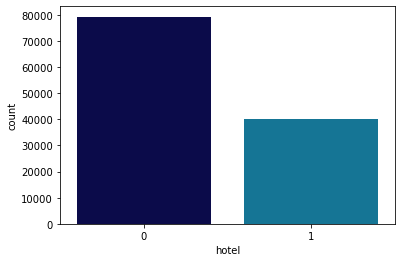

In [57]:
sns.countplot(data=hotel,x="hotel",palette="ocean")  # city hotel has more bookings than resort hotel

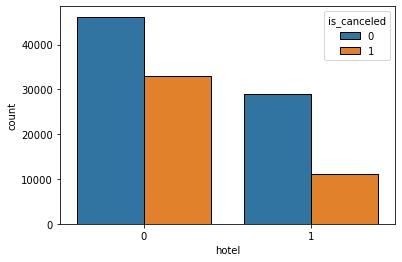

In [58]:
#Which Hotel has more camcelled booking   (0-City Hotel, 1-Resort Hotel)
sns.countplot(x="hotel",data=hotel,hue="is_canceled",edgecolor="black")
plt.show()                                            #1=canceled 0= not canceled

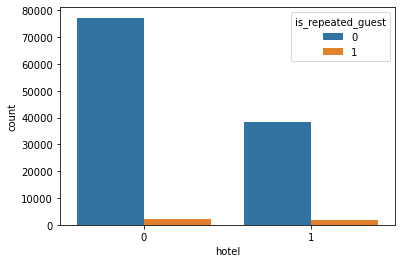

In [59]:
sns.countplot(data=hotel,x="hotel",hue="is_repeated_guest")  #0=not repeated 1= repeated
plt.show()

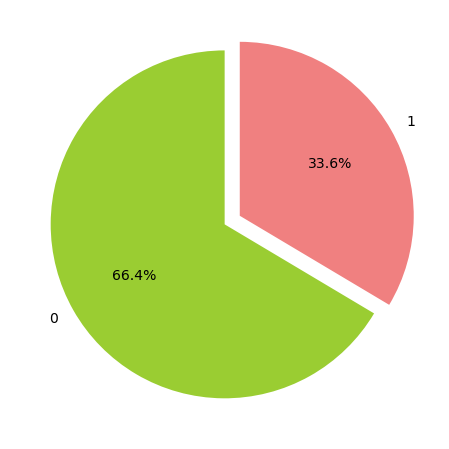

In [60]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

<AxesSubplot:>

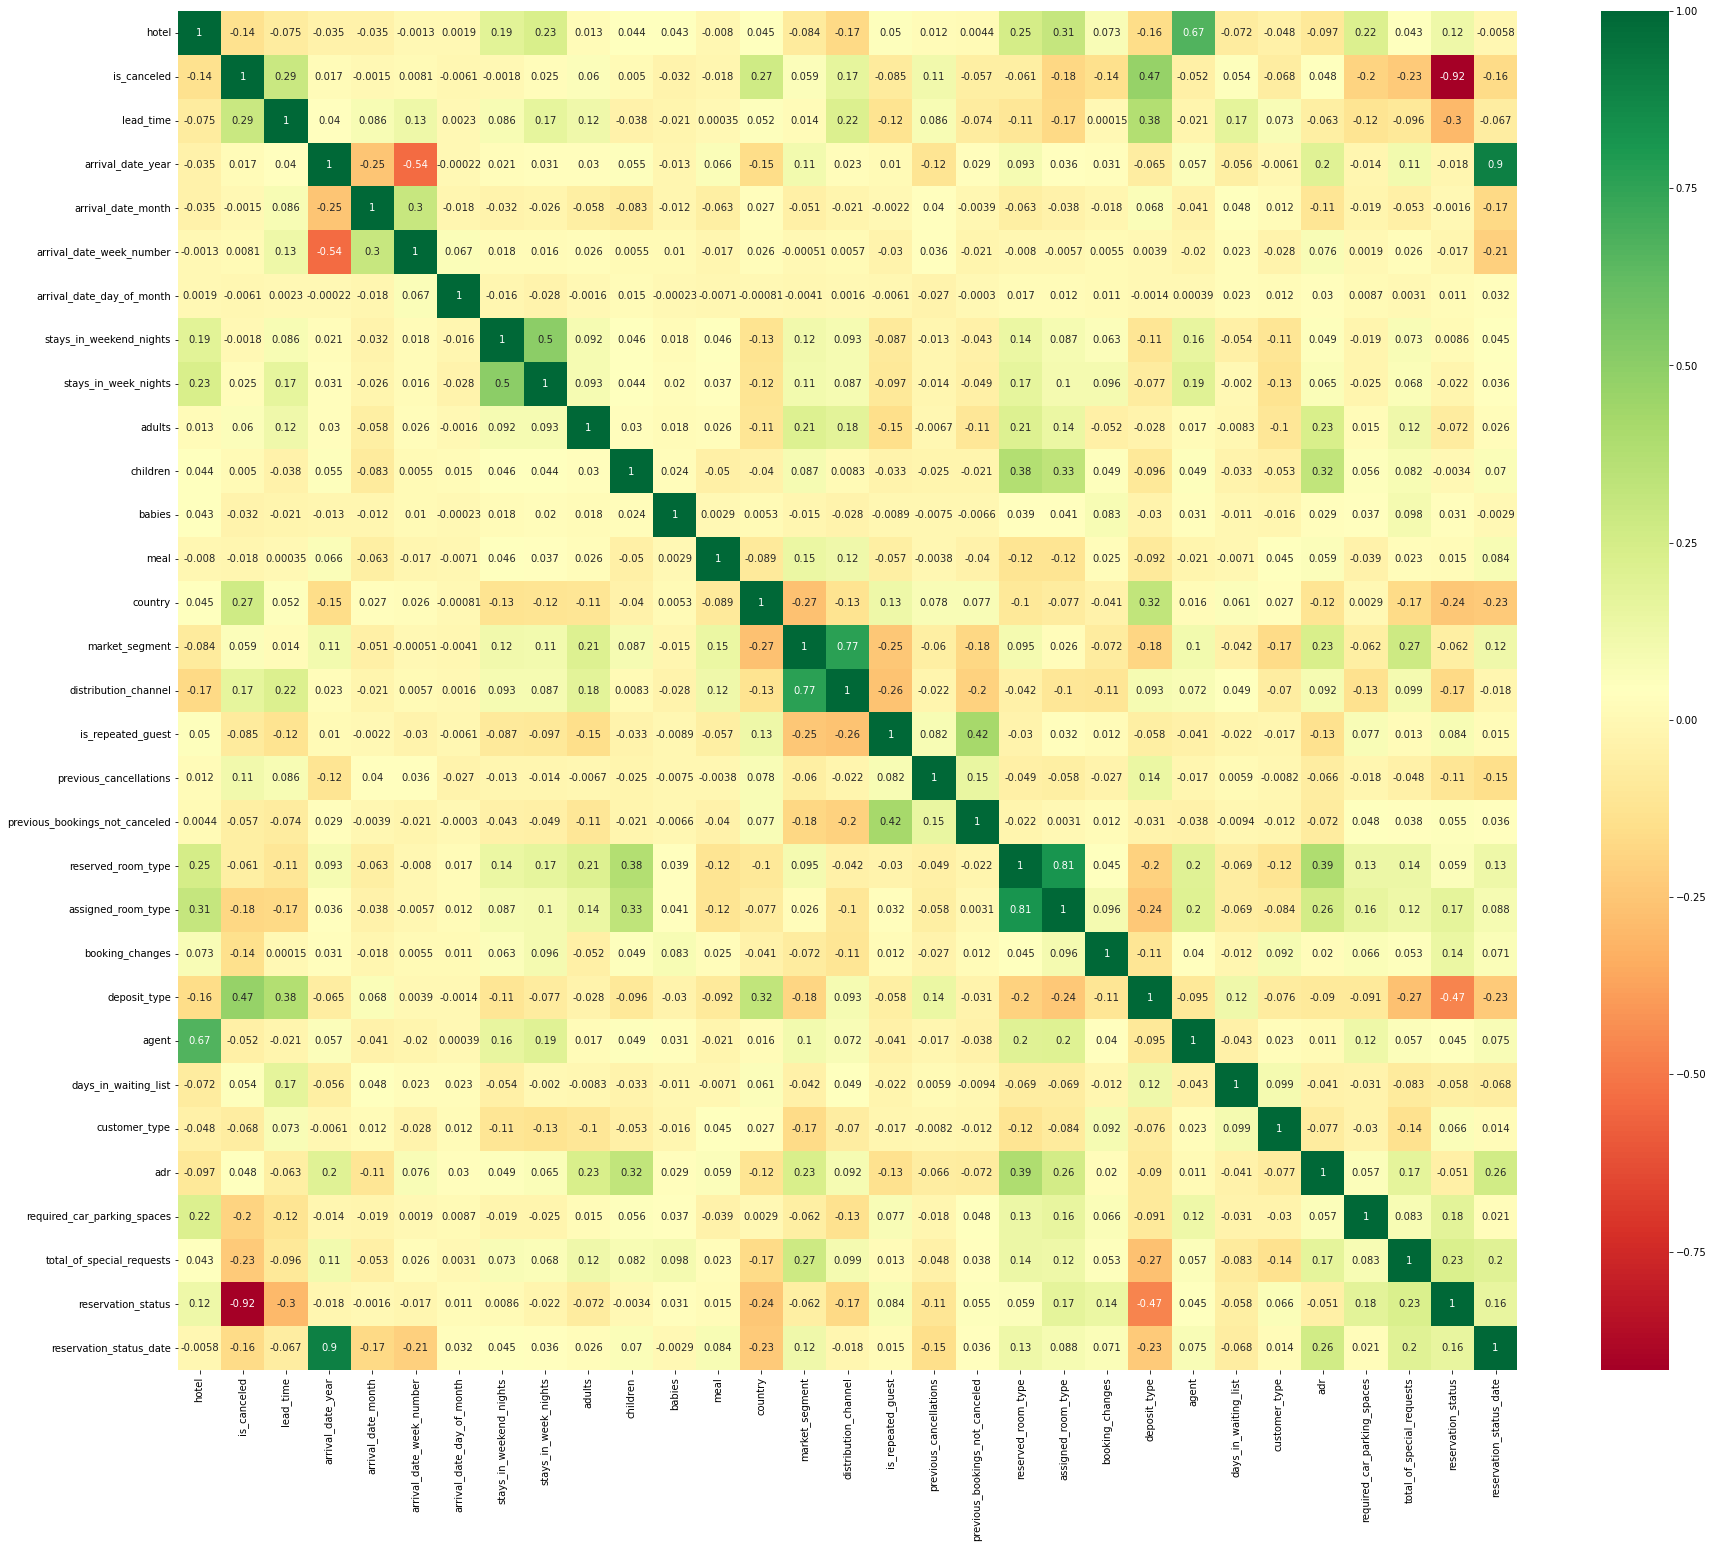

In [61]:
plt.figure(figsize=(30,25))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

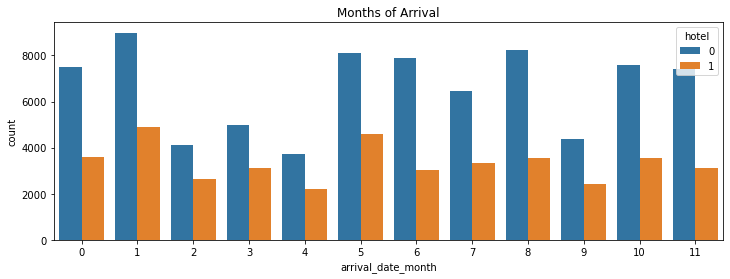

In [62]:
#Plotting the months against hotel type 
plt.figure(figsize=(12,4))    #0=City hotel ,1=resort hotel
sns.countplot(x='arrival_date_month', hue = 'hotel', data=hotel)
plt.title('Months of Arrival')
plt.show()

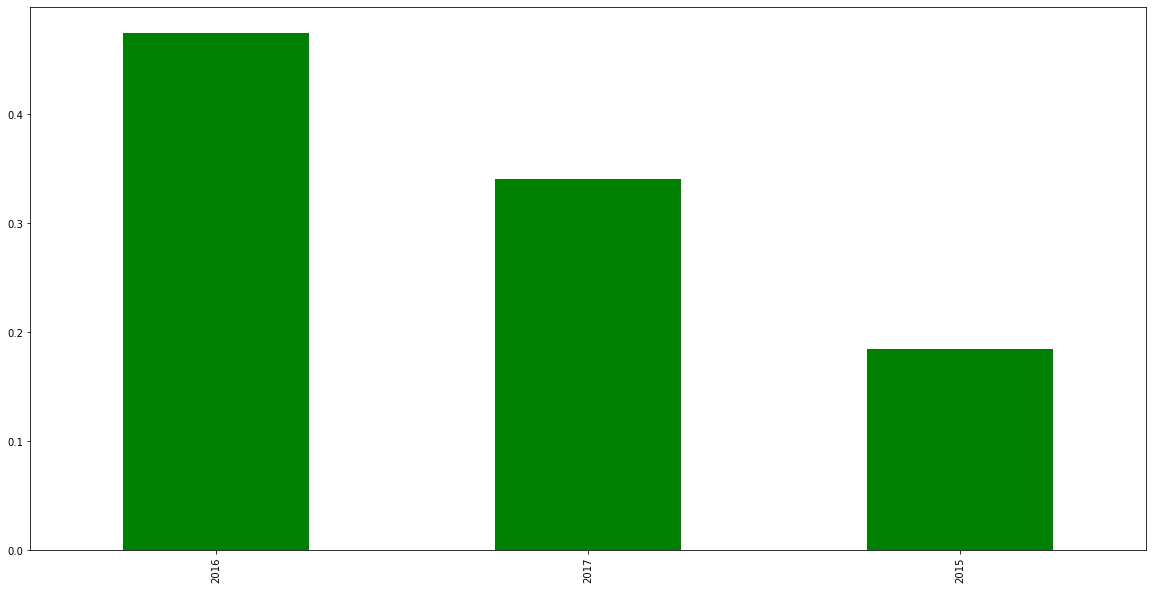

In [63]:
#the year in which most booked hotel
plt.figure(figsize=(20,10))
hotel.arrival_date_year.value_counts(normalize=True).plot(kind="bar",color='g')
plt.show()

# Model Building without treating outliers


In [64]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,14.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,14.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,14.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


In [65]:
can=hotel["is_canceled"] # saving target column in variable

In [66]:
hotel=hotel.drop(["is_canceled"],axis=1) #droping the target column 

In [67]:
h_n=pd.concat([hotel,can],axis=1)  #concatenating the dependant and independant columns for moving the target column at last
h_n.head(2)                        #it is just for splitting purpose

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,14.0,0,2,0.0,0,0,1,121,0
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,14.0,0,2,0.0,0,0,1,121,0


In [68]:
# saperating dependant and independant columns
x=h_n.iloc[:,:-1]
y=h_n.iloc[:,-1]

In [69]:
x.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,3,0,14.0,0,2,0.0,0,0,1,121
1,1,737,2015,5,27,1,0,0,2,0.0,...,4,0,14.0,0,2,0.0,0,0,1,121


In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [71]:
 from sklearn.model_selection import train_test_split

In [72]:
# splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((95512, 30), (23878, 30), (95512,), (23878,))

# 1. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [75]:
lg.fit(x_train,y_train)

LogisticRegression()

In [76]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [78]:
lg_c=confusion_matrix(lg_p,y_test)
lg_c

array([[13263,  2849],
       [ 1766,  6000]], dtype=int64)

In [79]:
lg_ac=lg_c.diagonal().sum()/lg_c.sum()*100
lg_ac

80.67258564368875

In [80]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     16112
           1       0.68      0.77      0.72      7766

    accuracy                           0.81     23878
   macro avg       0.78      0.80      0.79     23878
weighted avg       0.82      0.81      0.81     23878



In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [82]:
lg_f=f1_score(y_test, lg_p, average="macro")
lg_pr=precision_score(y_test,lg_p, average="macro")
lg_r=recall_score(y_test,lg_p, average="macro")

# 2. Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [84]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
dt_p=dt.predict(x_test)
dt_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [86]:
dt_c=confusion_matrix(dt_p,y_test)
dt_c

array([[15029,     0],
       [    0,  8849]], dtype=int64)

In [87]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

100.0

In [88]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [89]:
dt_f=f1_score(y_test, dt_p, average="macro")
dt_pr=precision_score(y_test,dt_p, average="macro")
dt_r=recall_score(y_test,dt_p, average="macro")

# 3. Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [91]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [93]:
rf_c=confusion_matrix(rf_p,y_test)
rf_c

array([[15029,     1],
       [    0,  8848]], dtype=int64)

In [94]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

99.99581204455986

In [95]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15030
           1       1.00      1.00      1.00      8848

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [96]:
rf_f=f1_score(y_test, rf_p, average="macro")
rf_pr=precision_score(y_test,rf_p, average="macro")
rf_r=recall_score(y_test,rf_p, average="macro")

# 4. Boosting
# 4.1 Ada Boost

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)

In [99]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [100]:
ab_p=ab.predict(x_test)
ab_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [101]:
ab_c=confusion_matrix(ab_p,y_test)
ab_c

array([[15029,     0],
       [    0,  8849]], dtype=int64)

In [102]:
ab_ac=ab_c.diagonal().sum()/ab_c.sum()*100
ab_ac

100.0

In [103]:
print(classification_report(ab_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [104]:
ab_f=f1_score(y_test, ab_p, average="macro")
ab_pr=precision_score(y_test,ab_p, average="macro")
ab_r=recall_score(y_test,ab_p, average="macro")

# 4.2 XG Boost

In [105]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [106]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [107]:
xg_p=xg.predict(x_test)
xg_p

array([1, 0, 1, ..., 0, 1, 1])

In [108]:
xg_c=confusion_matrix(xg_p,y_test)
xg_c

array([[15029,     0],
       [    0,  8849]], dtype=int64)

In [109]:
xg_ac=xg_c.diagonal().sum()/xg_c.sum()*100
xg_ac

100.0

In [110]:
print(classification_report(xg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [111]:
xg_f=f1_score(y_test, xg_p, average="macro")
xg_pr=precision_score(y_test,xg_p, average="macro")
xg_r=recall_score(y_test,xg_p, average="macro")

# 5. SVM

In [112]:
from sklearn.svm import SVC
sv=SVC() 

In [113]:
sv.fit(x_train,y_train)

SVC()

In [114]:
sv_p=sv.predict(x_test)
sv_p

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [115]:
sv_c=confusion_matrix(sv_p,y_test)
sv_c

array([[14190,  5903],
       [  839,  2946]], dtype=int64)

In [116]:
sv_ac=sv_c.diagonal().sum()/sv_c.sum()*100
sv_ac

71.76480442248095

In [117]:
print(classification_report(sv_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     20093
           1       0.33      0.78      0.47      3785

    accuracy                           0.72     23878
   macro avg       0.64      0.74      0.64     23878
weighted avg       0.85      0.72      0.75     23878



In [118]:
sv_f=f1_score(y_test, sv_p, average="macro")
sv_pr=precision_score(y_test,sv_p, average="macro")
sv_r=recall_score(y_test,sv_p, average="macro")

# 6. KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=24)

In [120]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [121]:
kn_p=kn.predict(x_test)
kn_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [122]:
kn_c=confusion_matrix(kn_p,y_test)
kn_c

array([[14312,  2599],
       [  717,  6250]], dtype=int64)

In [123]:
kn_ac=kn_c.diagonal().sum()/kn_c.sum()*100
kn_ac

86.11273976044896

In [124]:
print(classification_report(kn_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     16911
           1       0.71      0.90      0.79      6967

    accuracy                           0.86     23878
   macro avg       0.83      0.87      0.84     23878
weighted avg       0.88      0.86      0.87     23878



In [125]:
#AUC ROC curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
#As the values of TrueNegetives are less than the values of True positives therefore using AUC ROC Curve

In [126]:
roc=roc_auc_score(kn_p,y_test) 
roc

0.8716996572461013

In [127]:
kn_prob=kn.predict_proba(x_test)

In [128]:
df=pd.DataFrame(kn_prob)
df

,0,1
0,0.458333,0.541667
1,1.000000,0.000000
2,0.083333,0.916667
3,0.000000,1.000000
4,0.083333,0.916667
...,...,...
23873,0.875000,0.125000
23874,0.875000,0.125000
23875,1.000000,0.000000
23876,0.000000,1.000000


In [129]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

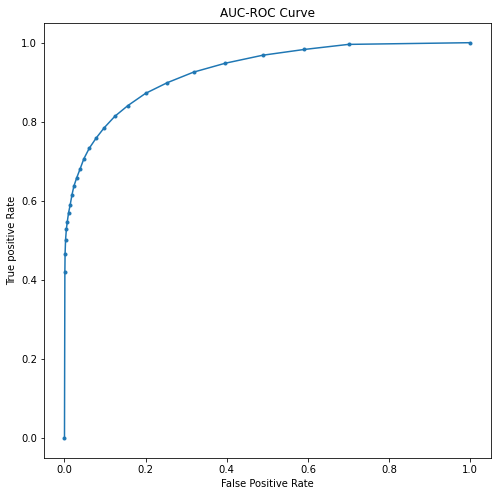

In [130]:
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("AUC-ROC Curve")

In [131]:
kn_f=f1_score(y_test, kn_p, average="macro")
kn_pr=precision_score(y_test,kn_p, average="macro")
kn_r=recall_score(y_test,kn_p, average="macro")

# 7. Naive Bayes

In [132]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [133]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [134]:
nb.fit(x_train,y_train)

MultinomialNB()

In [135]:
nb_p=nb.predict(x_test)
nb_p

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [136]:
nb_c=confusion_matrix(nb_p,y_test)
nb_c

array([[14989,  4330],
       [   40,  4519]], dtype=int64)

In [137]:

nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

81.6986347265265

In [138]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     19319
           1       0.51      0.99      0.67      4559

    accuracy                           0.82     23878
   macro avg       0.75      0.88      0.77     23878
weighted avg       0.90      0.82      0.83     23878



In [139]:
nb_f=f1_score(y_test, nb_p, average="macro")
nb_pr=precision_score(y_test,nb_p, average="macro")
nb_r=recall_score(y_test,nb_p, average="macro")

# Conclusion

In [140]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"] 
list2=[lg_ac,dt_ac,rf_ac,ab_ac,xg_ac,sv_ac,kn_ac,nb_ac]   
list3=[lg_pr,dt_pr,rf_pr,ab_pr,xg_pr,sv_pr,kn_pr,nb_pr]
list4=[lg_r,dt_r,rf_r,ab_r,xg_r,sv_r,kn_r,nb_r]
list5=[lg_f,dt_f,rf_f,ab_f,xg_f,sv_f,kn_f,nb_f]

In [141]:
df=pd.DataFrame({"Model Name":list1, "Accuracy":list2, "Precision":list3, "Recall":list4, "F1-Score":list5})
df

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.672586,0.797887,0.780268,0.787021
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.995812,0.999967,0.999943,0.999955
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,71.764804,0.742276,0.638547,0.637201
6,KNN,86.112740,0.871700,0.829293,0.843260
7,Naive Bayes,81.698635,0.883547,0.754009,0.773424


# Class Imbalance Treatment using Random Under Sampling

In [142]:
c_0,c_1=h_n["is_canceled"].value_counts()
c_0,c_1 #saving categorical values of target columns in variables

(75166, 44224)

In [143]:
h_0=h_n[h_n["is_canceled"]==0]
h_1=h_n[h_n["is_canceled"]==1]

In [144]:
h_0.shape,h_1.shape

((75166, 31), (44224, 31))

In [145]:
class_0under=h_0.sample(c_1)


In [146]:
class0_1=pd.concat([class_0under,h_1],axis=0)
class0_1

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
19904,1,5,2016,4,2,4,1,3,2,0.0,...,0,14.0,0,3,68.0,0,0,1,312,0
97688,0,220,2016,11,38,17,2,1,2,0.0,...,0,177.0,0,3,156.0,0,1,1,568,0
34574,1,338,2017,7,11,16,4,10,2,0.0,...,0,8.0,0,2,30.9,0,1,1,759,0
109291,0,27,2017,0,14,6,0,3,3,0.0,...,0,9.0,0,2,190.0,0,1,1,769,0
76814,0,2,2015,1,33,12,0,1,2,0.0,...,0,40.0,0,2,65.0,0,0,1,164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,132,2017,0,17,25,0,0,0,0.0,...,0,9.0,0,2,0.0,0,3,0,785,1
111355,0,4,2017,6,23,5,1,0,1,0.0,...,0,14.0,0,2,65.0,0,0,0,826,1
111924,0,7,2017,8,22,31,0,1,1,0.0,...,0,14.0,0,2,65.0,0,0,0,821,1
111925,0,6,2017,5,29,17,1,0,1,0.0,...,0,14.0,0,2,65.0,0,0,2,868,1


In [147]:
class0_1.is_canceled.value_counts()
#Random Under sampling balance the class distribution by randomly eliminating majority class values
#As data is having large no of rows it also helps to reduce execution time

0    44224
1    44224
Name: is_canceled, dtype: int64

# Outlier Treatment

In [148]:
class0_1.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_canceled'],
      dtype='object')

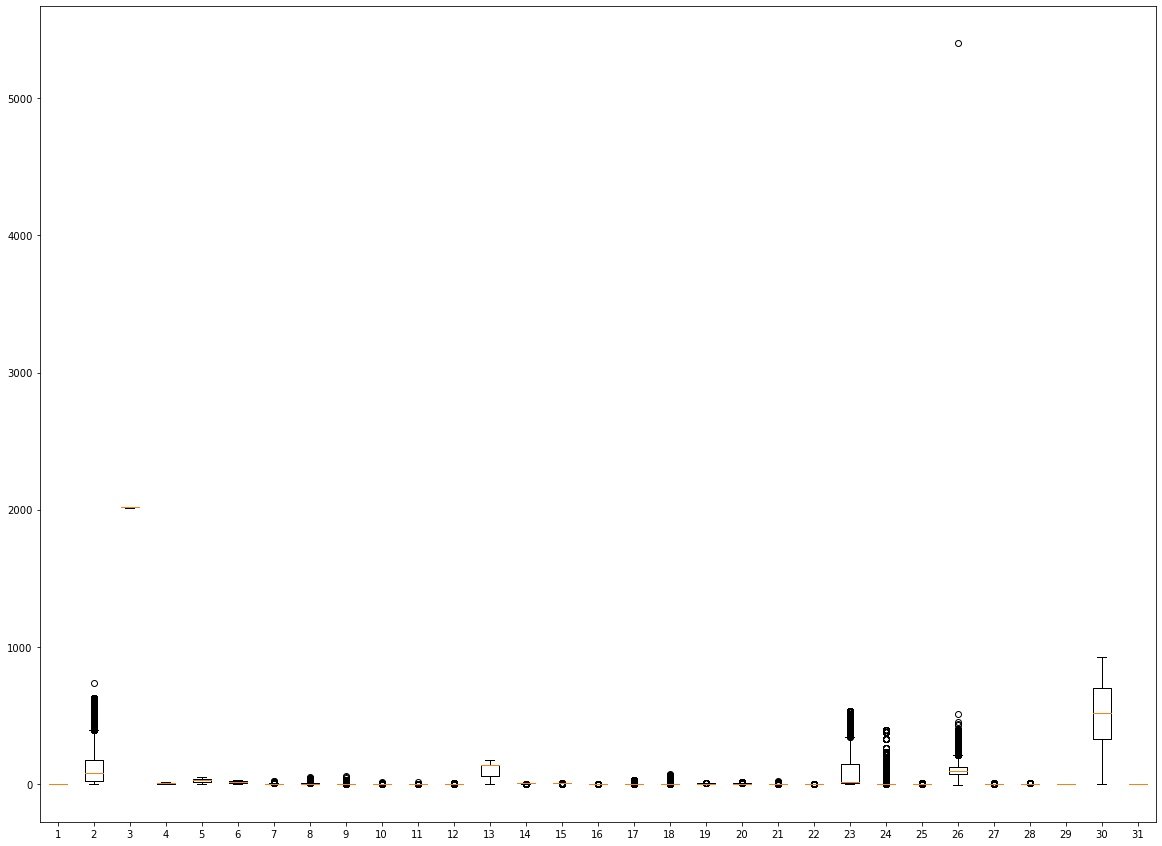

In [149]:
plt.figure(figsize=(20,15))
plt.boxplot(class0_1)
plt.show()

# lead_time

In [150]:
class0_1.lead_time.value_counts()     

0      3902
1      2211
2      1267
3      1143
4      1089
       ... 
362       1
737       1
463       1
435       1
380       1
Name: lead_time, Length: 476, dtype: int64

<AxesSubplot:xlabel='lead_time'>

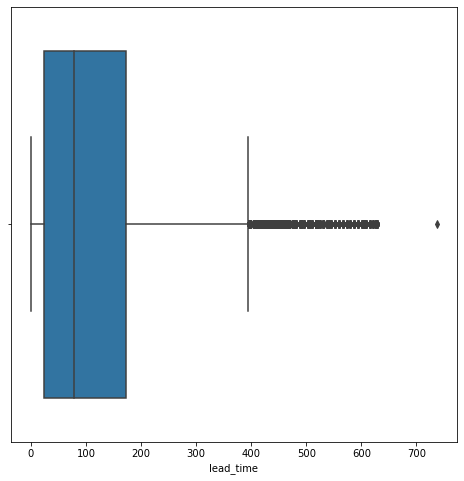

In [151]:
sns.boxplot(class0_1.lead_time)

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

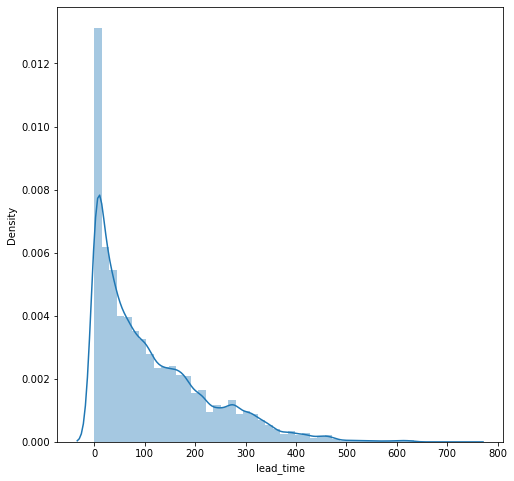

In [152]:
sns.distplot(class0_1.lead_time)

In [153]:
class0_1.lead_time.describe()

count    88448.000000
mean       112.663316
std        110.752761
min          0.000000
25%         23.000000
50%         79.000000
75%        172.000000
max        737.000000
Name: lead_time, dtype: float64

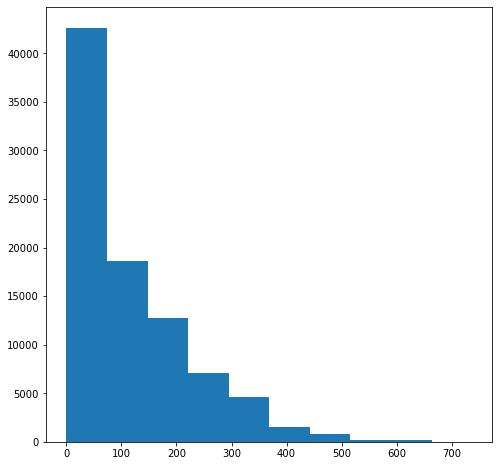

In [154]:
plt.hist(class0_1.lead_time)
plt.show()

In [155]:
iqr=class0_1.lead_time.quantile(0.75)-class0_1.lead_time.quantile(0.25)
iqr #As the data is skewed iqr technique is used

149.0

In [156]:
lb=class0_1["lead_time"].quantile(0.25)-(iqr*3)
ub=class0_1["lead_time"].quantile(0.75)+(iqr*3)
print(lb,ub)

-424.0 619.0


In [157]:
class0_1.loc[class0_1["lead_time"]>615,"lead_time"]=615 #outliers are above the maxima therefore upper boundary value is used

# agent

In [158]:
class0_1.agent.value_counts()

9.0      24325
14.0     13657
240.0    10453
1.0       6404
6.0       2389
         ...  
453.0        1
144.0        1
122.0        1
480.0        1
61.0         1
Name: agent, Length: 313, dtype: int64

<AxesSubplot:xlabel='agent'>

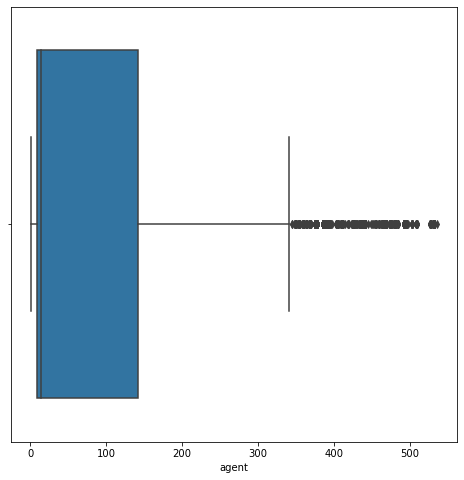

In [159]:
sns.boxplot(class0_1.agent)

<AxesSubplot:xlabel='agent', ylabel='Density'>

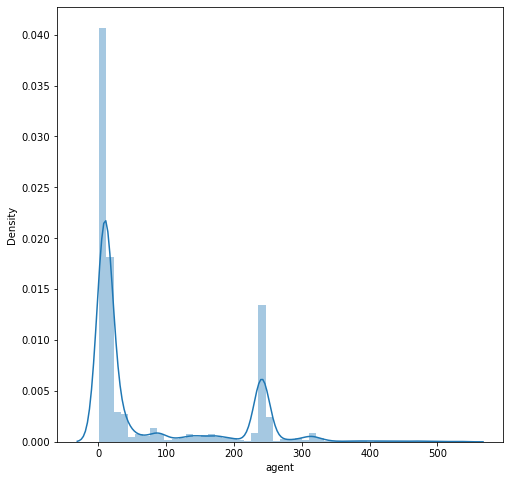

In [160]:
sns.distplot(class0_1.agent)

In [161]:
class0_1.agent.describe()

count    88448.000000
mean        75.166132
std        105.012055
min          1.000000
25%          9.000000
50%         14.000000
75%        142.000000
max        535.000000
Name: agent, dtype: float64

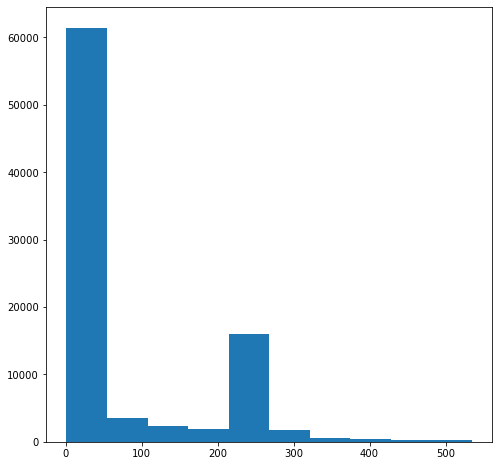

In [162]:
plt.hist(class0_1.agent)
plt.show()

In [163]:
iqr=class0_1.agent.quantile(0.75)-class0_1.agent.quantile(0.25)
iqr

133.0

In [164]:
lb=class0_1["agent"].quantile(0.25)-(iqr*3)
ub=class0_1["agent"].quantile(0.75)+(iqr*3)
print(lb,ub)

-390.0 541.0


In [165]:
class0_1.loc[class0_1["agent"]>545,"agent"]=545

# adr

In [166]:
class0_1.adr.value_counts()

62.00     3454
75.00     2103
90.00     2098
65.00     1750
80.00     1559
          ... 
129.44       1
70.97        1
137.96       1
37.53        1
56.80        1
Name: adr, Length: 7407, dtype: int64

<AxesSubplot:xlabel='adr'>

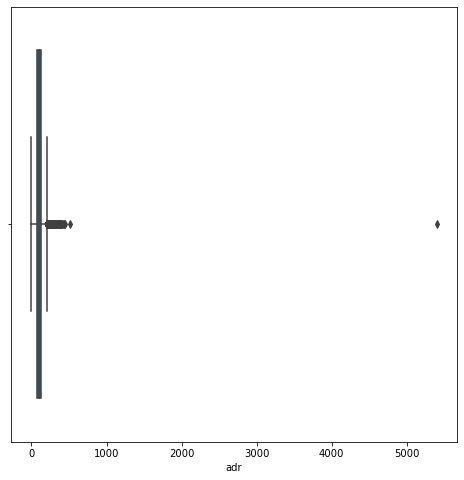

In [167]:
sns.boxplot(class0_1.adr)

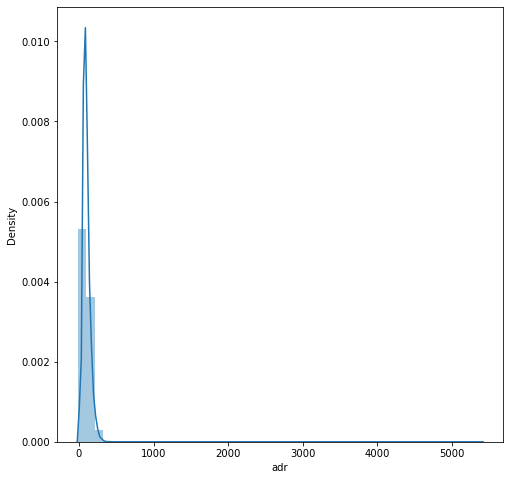

In [168]:
sns.distplot(class0_1.adr)
plt.show()

In [169]:
class0_1.adr.describe()

count    88448.000000
mean       102.572422
std         51.083203
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64

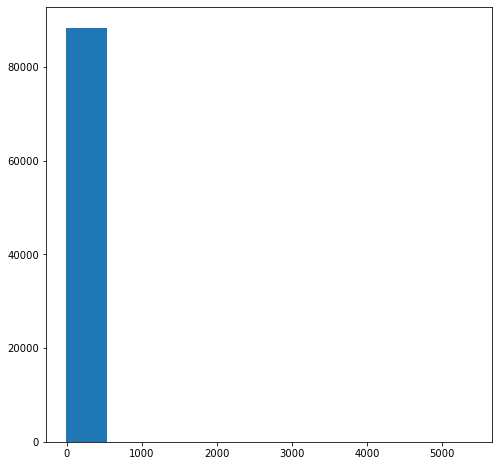

In [170]:
plt.hist(class0_1.adr)
plt.show()

In [171]:
iqr=class0_1.adr.quantile(0.75)-class0_1.adr.quantile(0.25)
iqr

56.0

In [172]:
lb=class0_1["adr"].quantile(0.25)-(iqr*3)
ub=class0_1["adr"].quantile(0.75)+(iqr*3)
print(lb,ub)

-98.0 294.0


In [173]:
class0_1.loc[class0_1["adr"]>294,"adr"]=294

# Data Transformation

# lead_time

In [174]:
class0_1.loc[class0_1["lead_time"]==0] # zero values are present therefore using square root transformation

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
32855,1,0,2017,3,6,6,1,1,2,0.0,...,0,14.0,0,2,47.00,1,0,1,709,0
106631,0,0,2017,3,9,26,2,0,2,0.0,...,0,152.0,0,2,58.31,0,0,1,729,0
33750,1,0,2017,3,9,28,0,2,2,0.0,...,0,240.0,0,2,68.00,0,1,1,731,0
84587,0,0,2016,3,9,24,1,4,2,0.0,...,0,14.0,0,2,101.28,1,2,1,364,0
76999,0,0,2015,1,35,26,0,1,1,0.0,...,0,3.0,0,2,0.00,0,1,1,178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98809,0,0,2016,2,51,12,1,0,2,0.0,...,0,341.0,0,2,77.00,0,2,0,651,1
98810,0,0,2016,2,51,12,1,0,2,0.0,...,0,341.0,0,2,0.00,0,2,0,651,1
101930,0,0,2017,6,26,29,0,1,2,0.0,...,0,45.0,0,2,0.00,0,0,0,850,1
105909,0,0,2017,0,16,18,0,1,1,0.0,...,0,14.0,0,2,0.00,0,2,0,778,1


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

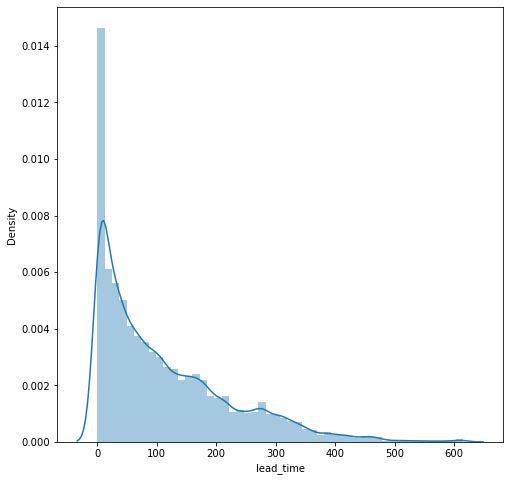

In [175]:
sns.distplot(class0_1.lead_time)

In [176]:
class0_1.lead_time.skew()

1.2633896461353806

In [177]:
class0_1.lead_time=np.sqrt(class0_1.lead_time) #As zero values are present in column therefore square root method is used

In [178]:
class0_1.lead_time.skew()

0.23458633766239362

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

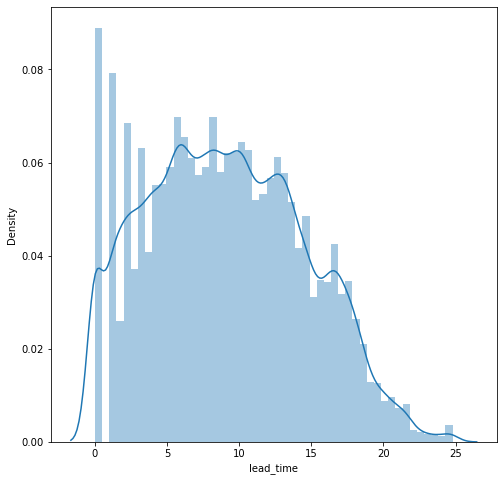

In [179]:
sns.distplot(class0_1.lead_time)

# agent

In [180]:
class0_1.loc[class0_1["agent"]==0] # no zero values are present therefore using log transformation

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled


<AxesSubplot:xlabel='agent', ylabel='Density'>

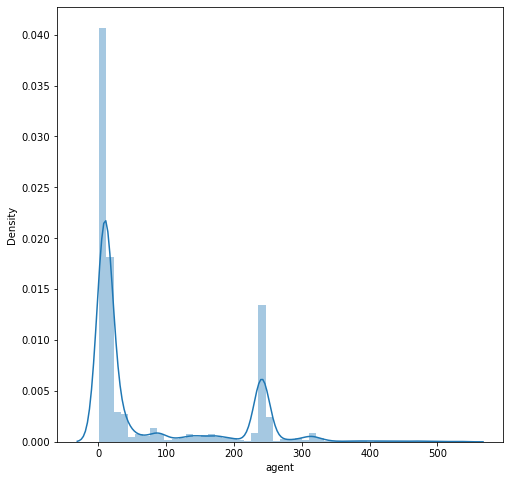

In [181]:
sns.distplot(class0_1.agent)

In [182]:
class0_1.agent.skew()

1.3422820447859611

In [183]:
class0_1.agent=np.log(class0_1.agent)

In [184]:
class0_1.agent.skew()

0.17293668266180104

In [185]:
#sns.distplot(class0_1.agent)

In [186]:
class0_1.skew() # range of skewness is -1 to 1

hotel                              0.784011
lead_time                          0.234586
arrival_date_year                 -0.242086
arrival_date_month                -0.045779
arrival_date_week_number          -0.010096
arrival_date_day_of_month         -0.004108
stays_in_weekend_nights            1.395073
stays_in_week_nights               2.942754
adults                            22.303958
children                           4.122603
babies                            24.612536
meal                               1.590091
country                           -0.304647
market_segment                    -1.005515
distribution_channel              -2.049903
is_repeated_guest                  5.767481
previous_cancellations            21.779412
previous_bookings_not_canceled    24.640529
reserved_room_type                 1.492836
assigned_room_type                 1.251606
booking_changes                    6.082971
deposit_type                       1.855779
agent                           

# Splitting the data

In [187]:
u_x=class0_1.iloc[:,0:-1]
u_y=class0_1.iloc[:,-1]

In [188]:
u_x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
19904,1,2.236068,2016,4,2,4,1,3,2,0.0,...,0,0,2.639057,0,3,68.0,0,0,1,312
97688,0,14.832397,2016,11,38,17,2,1,2,0.0,...,0,0,5.176150,0,3,156.0,0,1,1,568
34574,1,18.384776,2017,7,11,16,4,10,2,0.0,...,0,0,2.079442,0,2,30.9,0,1,1,759
109291,0,5.196152,2017,0,14,6,0,3,3,0.0,...,0,0,2.197225,0,2,190.0,0,1,1,769
76814,0,1.414214,2015,1,33,12,0,1,2,0.0,...,0,0,3.688879,0,2,65.0,0,0,1,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,11.489125,2017,0,17,25,0,0,0,0.0,...,1,0,2.197225,0,2,0.0,0,3,0,785
111355,0,2.000000,2017,6,23,5,1,0,1,0.0,...,0,0,2.639057,0,2,65.0,0,0,0,826
111924,0,2.645751,2017,8,22,31,0,1,1,0.0,...,0,0,2.639057,0,2,65.0,0,0,0,821
111925,0,2.449490,2017,5,29,17,1,0,1,0.0,...,0,0,2.639057,0,2,65.0,0,0,2,868


In [189]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)

In [190]:
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((70758, 30), (17690, 30), (70758,), (17690,))



# Feature Selection

# Random forest

In [191]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [192]:
rf.feature_importances_

array([1.30548915e-03, 3.04011850e-02, 3.45061604e-03, 2.05339611e-03,
       4.00374369e-03, 2.65569758e-03, 1.82047091e-03, 2.28628566e-03,
       1.08602355e-03, 4.65938529e-04, 5.27466506e-05, 8.26257269e-04,
       3.61709145e-02, 2.06959594e-02, 5.94276156e-03, 7.44018213e-04,
       9.55367490e-03, 1.42098686e-03, 3.27047630e-03, 7.26259196e-03,
       7.18012646e-03, 6.16922106e-02, 1.12817360e-02, 3.29939823e-04,
       6.88041284e-03, 6.51388466e-03, 1.23777780e-02, 2.36077314e-02,
       7.15691198e-01, 1.89757485e-02])

In [193]:
df1=pd.DataFrame({"Importances":list(rf.feature_importances_),"Columns":list(x)})
df1

,Importances,Columns
0,0.001305,hotel
1,0.030401,lead_time
2,0.003451,arrival_date_year
3,0.002053,arrival_date_month
4,0.004004,arrival_date_week_number
5,0.002656,arrival_date_day_of_month
6,0.001820,stays_in_weekend_nights
7,0.002286,stays_in_week_nights
8,0.001086,adults
9,0.000466,children


In [194]:
# All features are important

# Model building after treating Outliers


# 1. Logistic Regression

In [195]:
lg.fit(u_x_train,u_y_train)

LogisticRegression()

In [196]:
lg_p1=lg.predict(u_x_test)
lg_p1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [197]:
lg_c1=confusion_matrix(lg_p1,u_y_test)
lg_c1

array([[6749, 2194],
       [2103, 6644]], dtype=int64)

In [198]:
lg_ac1=lg_c1.diagonal().sum()/lg_c1.sum()*100
lg_ac1

75.70944036178632

In [199]:
print(classification_report(lg_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      8943
           1       0.75      0.76      0.76      8747

    accuracy                           0.76     17690
   macro avg       0.76      0.76      0.76     17690
weighted avg       0.76      0.76      0.76     17690



In [200]:
lg_f1=f1_score(u_y_test, lg_p1, average="macro")
lg_pr1=precision_score(u_y_test,lg_p1, average="macro")
lg_r1=recall_score(u_y_test,lg_p1, average="macro")

# 2. Decision Tree

In [201]:
dt.fit(u_x_train,u_y_train)

DecisionTreeClassifier()

In [202]:
dt_p1=dt.predict(u_x_test)
dt_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [203]:
dt_c1=confusion_matrix(dt_p1,u_y_test)
dt_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [204]:
dt_ac1=dt_c1.diagonal().sum()/dt_c1.sum()*100
dt_ac1

100.0

In [205]:
print(classification_report(dt_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [206]:
dt_f1=f1_score(u_y_test, dt_p1, average="macro")
dt_pr1=precision_score(u_y_test,dt_p1, average="macro")
dt_r1=recall_score(u_y_test,dt_p1, average="macro")

# 3. Random Forest

In [207]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [208]:
rf_p1=rf.predict(u_x_test)
rf_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [209]:
rf_c1=confusion_matrix(rf_p1,u_y_test)
rf_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [210]:
rf_ac1=rf_c1.diagonal().sum()/rf_c1.sum()*100
rf_ac1

100.0

In [211]:
print(classification_report(rf_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [212]:
rf_f1=f1_score(u_y_test, rf_p1, average="macro")
rf_pr1=precision_score(u_y_test,rf_p1, average="macro")
rf_r1=recall_score(u_y_test,rf_p1, average="macro")

# 4. Boosting
# 4.1 Ada Boost

In [213]:
ab.fit(u_x_train,u_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [214]:
ab_p1=ab.predict(u_x_test)
ab_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [215]:
ab_c1=confusion_matrix(ab_p1,u_y_test)
ab_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [216]:
ab_ac1=ab_c1.diagonal().sum()/ab_c1.sum()*100
ab_ac1

100.0

In [217]:
print(classification_report(ab_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [218]:
ab_f1=f1_score(u_y_test, ab_p1, average="macro")
ab_pr1=precision_score(u_y_test,ab_p1, average="macro")
ab_r1=recall_score(u_y_test,ab_p1, average="macro")

# 4.2 XG Boost

In [219]:
xg.fit(u_x_train,u_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [220]:
xg_p1=xg.predict(u_x_test)
xg_p1

array([0, 1, 1, ..., 1, 1, 0])

In [221]:
xg_c1=confusion_matrix(xg_p1,u_y_test)
xg_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [222]:
xg_ac1=xg_c1.diagonal().sum()/xg_c1.sum()*100
xg_ac1

100.0

In [223]:
print(classification_report(xg_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [224]:
xg_f1=f1_score(u_y_test, xg_p1, average="macro")
xg_pr1=precision_score(u_y_test,xg_p1, average="macro")
xg_r1=recall_score(u_y_test,xg_p1, average="macro")

# 5. SVM

In [225]:
sv.fit(u_x_train,u_y_train)

SVC()

In [226]:
sv_p1=sv.predict(u_x_test)
sv_p1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [227]:
sv_c1=confusion_matrix(sv_p1,u_y_test)
sv_c1

array([[5702, 2749],
       [3150, 6089]], dtype=int64)

In [228]:
sv_ac1=sv_c1.diagonal().sum()/sv_c1.sum()*100
sv_ac1

66.65347654041831

In [229]:
print(classification_report(sv_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      8451
           1       0.69      0.66      0.67      9239

    accuracy                           0.67     17690
   macro avg       0.67      0.67      0.67     17690
weighted avg       0.67      0.67      0.67     17690



In [230]:
sv_f1=f1_score(u_y_test, sv_p1, average="macro")
sv_pr1=precision_score(u_y_test,sv_p1, average="macro")
sv_r1=recall_score(u_y_test,sv_p1, average="macro")

# 6. KNN

In [231]:
kn.fit(u_x_train,u_y_train)

KNeighborsClassifier(n_neighbors=24)

In [232]:
kn_p1=kn.predict(u_x_test)
kn_p1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [233]:
kn_c1=confusion_matrix(kn_p1,u_y_test)
kn_c1

array([[8356, 1874],
       [ 496, 6964]], dtype=int64)

In [234]:
kn_ac1=kn_c1.diagonal().sum()/kn_c1.sum()*100
kn_ac1

86.60260033917467

In [235]:
print(classification_report(kn_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     10230
           1       0.79      0.93      0.85      7460

    accuracy                           0.87     17690
   macro avg       0.87      0.88      0.87     17690
weighted avg       0.88      0.87      0.87     17690



In [236]:
kn_f1=f1_score(u_y_test, kn_p1, average="macro")
kn_pr1=precision_score(u_y_test,kn_p1, average="macro")
kn_r1=recall_score(u_y_test,kn_p1, average="macro")

# 7. Naive Bayes

In [237]:
#as some columns in data contain negetive values and minmaxscaler takes positive value so we have used this syntax
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
u_x_train = scaler.fit_transform(u_x_train)  
u_x_test = scaler.transform(u_x_test) 

In [238]:
nb.fit(u_x_train,u_y_train) 

MultinomialNB()

In [239]:
nb_p1=nb.predict(u_x_test)
nb_p1 

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [240]:
nb_c1=confusion_matrix(nb_p1,u_y_test)
nb_c1 

array([[8822, 1086],
       [  30, 7752]], dtype=int64)

In [241]:
nb_ac1=nb_c1.diagonal().sum()/nb_c1.sum()*100
nb_ac1 

93.69135104578858

In [242]:
print(classification_report(nb_p1,u_y_test)) 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9908
           1       0.88      1.00      0.93      7782

    accuracy                           0.94     17690
   macro avg       0.94      0.94      0.94     17690
weighted avg       0.94      0.94      0.94     17690



In [243]:
roc_n=roc_auc_score(nb_p1,u_y_test)
roc_n

0.9432682763148025

In [244]:
nb1_prob=nb.predict_proba(u_x_test)

In [245]:
df_n=pd.DataFrame(nb1_prob)
df_n

,0,1
0,0.641843,0.358157
1,0.064319,0.935681
2,0.044116,0.955884
3,0.047976,0.952024
4,0.678406,0.321594
...,...,...
17685,0.399814,0.600186
17686,0.044116,0.955884
17687,0.044484,0.955516
17688,0.045914,0.954086


In [246]:
fpr,tpr,threshold=roc_curve(u_y_test,df_n.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

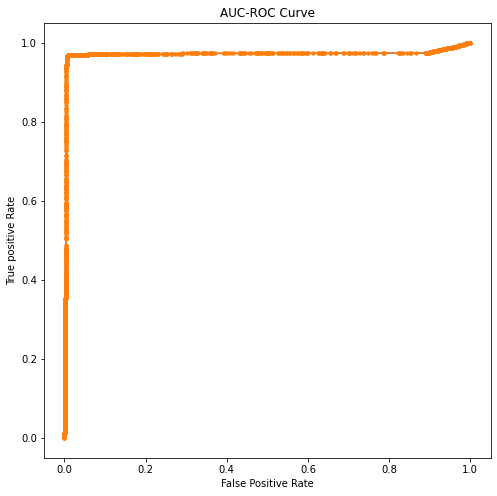

In [247]:
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("AUC-ROC Curve")

In [248]:
nb_f1=f1_score(u_y_test, nb_p1, average="macro")
nb_pr1=precision_score(u_y_test,nb_p1, average="macro")
nb_r1=recall_score(u_y_test,nb_p1, average="macro")

# Conclusion

In [249]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"] 
list2=[lg_ac1,dt_ac1,rf_ac1,ab_ac1,xg_ac1,sv_ac1,kn_ac1,nb_ac1] 
list3=[lg_pr1,dt_pr1,rf_pr1,ab_pr1,xg_pr1,sv_pr1,kn_pr1,nb_pr1]
list4=[lg_r1,dt_r1,rf_r1,ab_r1,xg_r1,sv_r1,kn_r1,nb_r1]
list5=[lg_f1,dt_f1,rf_f1,ab_f1,xg_f1,sv_f1,kn_f1,nb_f1]

In [250]:
df1=pd.DataFrame({"Model Name":list1, "Accuracy":list2, "Precision":list3, "Recall":list4, "F1-Score":list5})
df1 

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,75.709440,0.757122,0.757090,0.757086
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,100.000000,1.000000,1.000000,1.000000
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,66.653477,0.666884,0.666552,0.666375
6,KNN,86.602600,0.875163,0.865964,0.865191
7,Naive Bayes,93.691351,0.943268,0.936866,0.936682


In [251]:
df

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.672586,0.797887,0.780268,0.787021
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.995812,0.999967,0.999943,0.999955
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,71.764804,0.742276,0.638547,0.637201
6,KNN,86.112740,0.871700,0.829293,0.843260
7,Naive Bayes,81.698635,0.883547,0.754009,0.773424


# Cross Validation

In [252]:
from sklearn.model_selection import cross_val_score,KFold

In [253]:
u_x=class0_1.iloc[:,0:-1]
u_y=class0_1.iloc[:,-1]

In [254]:
kf=KFold(n_splits=5)
score=cross_val_score(kn,x,y,cv=kf)
print("cross validation scores are{}".format(score))
print("average cross validation score of kn:{}".format(score.mean()))

cross validation scores are[0.60578775 0.51101432 0.29872686 0.54627691 0.30572075]
average cross validation score of kn:0.453505318703409


In [255]:
kf=KFold(n_splits=5)
score=cross_val_score(nb,u_x,u_y,cv=kf)
print("cross validation scores are{}".format(score))
print("average cross validation score of nb:{}".format(score.mean()))

cross validation scores are[       nan        nan 0.61407575        nan        nan]
average cross validation score of nb:nan
